<a href="https://colab.research.google.com/github/ogodicoelho/github-ImersaoAlura/blob/master/Alura_Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Imersao Dados Alura
###Aula3 - CORRELAÇÕES, CAUSALIDADE E RELAÇÕES ENTRE GENES.
####Autor: Diogo Coelho - 05/05/2021

In [1]:
#bibliotecas utilizads
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#fonte dos dados
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

#leitura
dados = pd.read_csv(url_dados, compression = 'zip')
dados.head(3)

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931


In [3]:
#usando crosstab
# pd.crosstab(dados['dose'], dados['tempo'])

#tabela de frequências multi-index
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])

#normaliza os valores entre [0,1]
#pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

**Desafio 01: Criar tabelas de frequência com pandas.groupby()**



In [27]:
# Contando quantidade de eventos por dose, tempo e tratamento
dados.groupby(['dose','tempo','tratamento'])['tratamento'].count().to_frame()


tratamento
dose tempo tratamento              
D1   24    com_controle         301
           com_droga           3585
     48    com_controle         343
           com_droga           4011
     72    com_controle         307
           com_droga           3600
D2   24    com_controle         305
           com_droga           3581
     48    com_controle         305
           com_droga           3591
     72    com_controle         305
           com_droga           3580

**Desafio 02: Normalizar o crosstab pela coluna.**

Possível utilizar:
- all: normaliza todos os valores
- index: normaliza por linha
- columns: normaliza por coluna


In [32]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

**Desafio 03: Explorar outros agregadores.**

In [26]:
# Calculando a media da variável g-0 por dose, tempo e tratamento
dados.groupby(by=['dose','tempo','tratamento'])['g-0','g-1'].agg(['mean','min','max'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


g-0                      g-1              
                             mean    min     max      mean    min    max
dose tempo tratamento                                                   
D1   24    com_controle -0.251760 -2.370   3.226 -0.453322 -3.341  1.417
           com_droga     0.367996 -5.183   9.908 -0.170839 -5.202  3.954
     48    com_controle -0.122773 -3.276   3.423 -0.453638 -2.833  1.503
           com_droga     0.412469 -5.420  10.000 -0.142581 -4.333  2.975
     72    com_controle -0.295271 -2.086   2.584 -0.669059 -3.205  1.436
           com_droga     0.286250 -5.261   9.355 -0.127878 -5.737  3.322
D2   24    com_controle  0.010754 -2.135   2.601 -0.229451 -2.597  5.039
           com_droga     0.115253 -5.233   7.167 -0.081764 -3.109  3.187
     48    com_controle  0.013174 -4.859   4.335  0.001737 -2.878  3.745
           com_droga     0.214480 -4.567  10.000 -0.001143 -2.913  5.033
     72    com_controle  0.070250 -1.909   4.670  0.133537 -1.660  3.252
           com_droga     0.253439 -5.513  10.000  0.052840 -3.364  4.676

In [37]:
# parametro margins=True adiciona subtotal por linha e coluna
pd.crosstab(index=[dados['tratamento'],dados['dose']], columns=dados['tempo'], margins=True)

tempo                24    48    72    All
tratamento   dose                         
com_controle D1     301   343   307    951
             D2     305   305   305    915
com_droga    D1    3585  4011  3600  11196
             D2    3581  3591  3580  10752
All                7772  8250  7792  23814

**Desafio 04: Explorar o melt.**

pd.melt() é uma função para facilitar análise de tabelas com muitas colunas reagrupando em linhas enumeradas (index).

In [50]:
dados.melt(id_vars=['tempo','dose', 'tratamento'], value_vars=['g-0', 'c-0'], var_name='variável', value_name='valor')

,tempo,dose,tratamento,variável,valor
0,24,D1,com_droga,g-0,1.0620
1,72,D1,com_droga,g-0,0.0743
2,48,D1,com_droga,g-0,0.6280
3,48,D1,com_droga,g-0,-0.5138
4,72,D2,com_droga,g-0,-0.3254
...,...,...,...,...,...
47623,24,D2,com_droga,c-0,0.4224
47624,24,D2,com_droga,c-0,0.2144
47625,48,D2,com_controle,c-0,1.0650
47626,24,D1,com_droga,c-0,0.5377


**Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.**

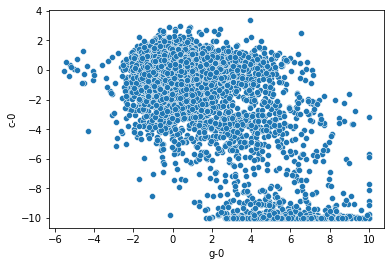

In [70]:
#scatterplot
sns.scatterplot(x='g-0', y = 'c-0', data=dados)

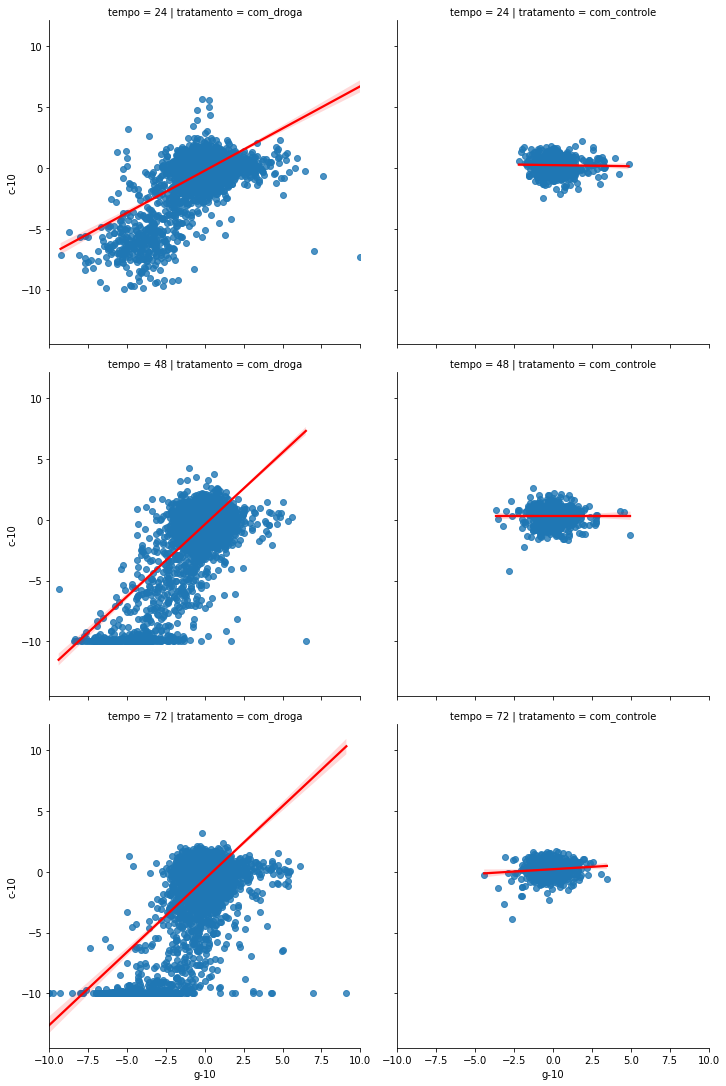

In [71]:
# lmplot vai desenhar no nosso gráfico de dispersão uma linha de tendência
# adicionando col e row para subdividir pelas categorias do dataframe

sns.lmplot(data=dados, x='g-10', y='c-10', line_kws={'color': 'red'}, col='tratamento', row='tempo')

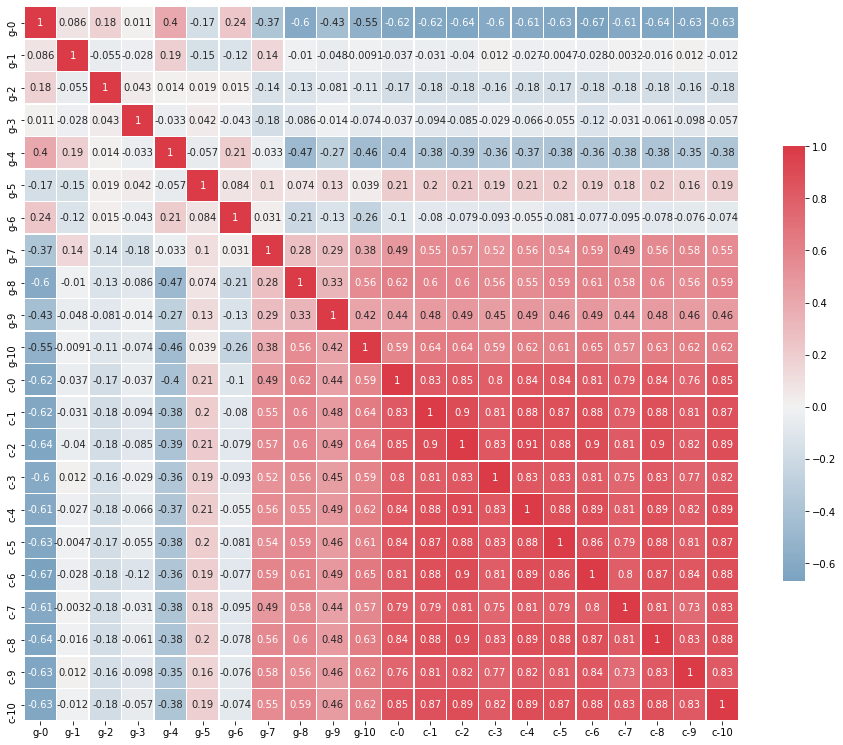

In [81]:
corrDados= pd.concat([dados.loc[:,'g-0':'g-10'],dados.loc[:,'c-0':'c-10']],axis=1).corr()

plt.figure(figsize=(16,16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(corrDados, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5}, center=0, cmap=cmap)

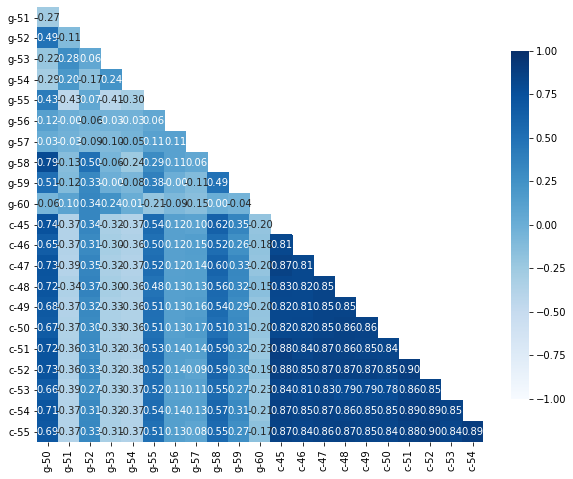

In [94]:
import numpy as np

corrDados2 = pd.concat([dados.loc[:,'g-50':'g-60'],dados.loc[:,'c-45':'c-55']],axis=1).corr()

fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(corrDados2, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = corrDados2.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

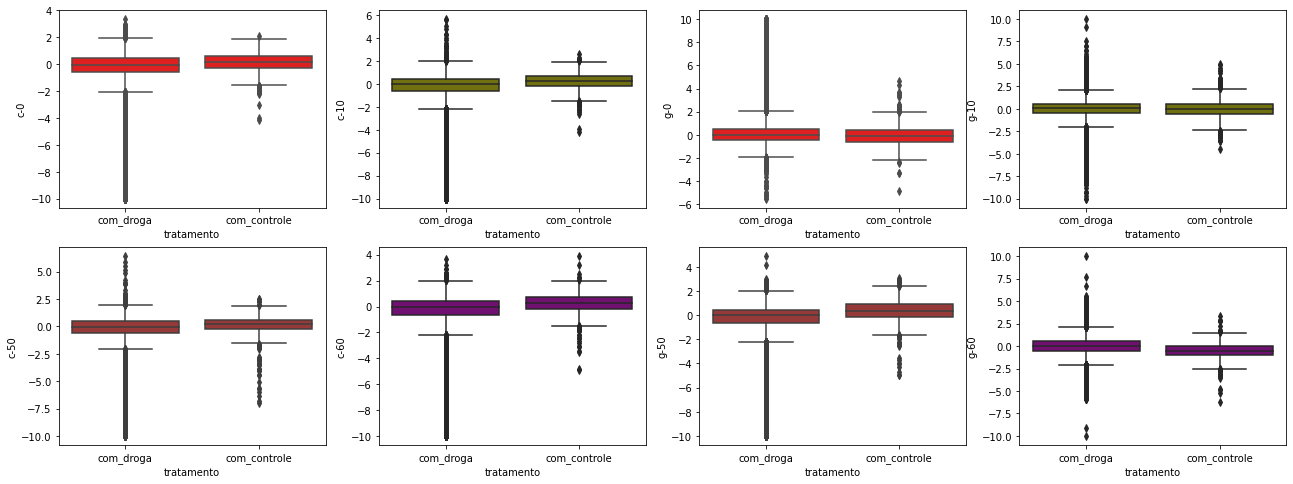

In [91]:
# plt.figure(figsize=(10,8))
# sns.boxplot(y='g-0', x='tratamento' , data=dados)


fig, axs = plt.subplots(2,4, figsize=(22,8))


sns.boxplot(data=dados, x='tratamento',y='c-0', color='red', ax=axs[0,0])
sns.boxplot(data=dados, x='tratamento',y='c-10' , color='olive', ax=axs[0,1])
sns.boxplot(data=dados, x='tratamento',y='c-50' , color='brown', ax=axs[1,0])
sns.boxplot(data=dados, x='tratamento',y='c-60' , color='purple', ax=axs[1,1])
sns.boxplot(data=dados, x='tratamento',y='g-0', color='red', ax=axs[0,2])
sns.boxplot(data=dados, x='tratamento',y='g-10' , color='olive', ax=axs[0,3])
sns.boxplot(data=dados, x='tratamento',y='g-50' , color='brown', ax=axs[1,2])
sns.boxplot(data=dados, x='tratamento',y='g-60' , color='purple', ax=axs[1,3])
plt.show()

**Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)**

Fontes: 
*       https://seaborn.pydata.org/generated/seaborn.heatmap.html
*       https://seaborn.pydata.org/generated/seaborn.diverging_palette.html 

In [91]:

# Cria máscara para a matriz triangular superior, ou inferior np.tril()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Ajuste do tamanho da imagem plotada
f, ax = plt.subplots(figsize=(11, 9))

# Gera o mapa de cor 
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Gera a matriz de correlação com os parâmetros de máscara, aspecto quadrado, tamanho dos blocos
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Desafio 07: Resumo do que você aprendeu com os dados**



*   Utilização do pd.crosstab() para agrupar informações por categorias, assim como o pandas.groupby()
*   Normalização dos dados por linha e coluna para ver a representatividade por categorias
*   Função melt() para facilitar visualização de tabelas com muitas colunas
*   Função corr() para correlacionar os dados
*   Gráficos como scartterplot e heatmap para visualizar melhor as correlações

